### Drone Classifier ###
A Classifier that can classify the category of drone based on the image 
Three Major Catagories of Drones are
1)Fixed wing Drone
2)Singlerotor Drone
3)Multirotor Drone

In [0]:
from fastai.vision import *

In [0]:
%cd 'drive/My Drive'

/content/drive/My Drive


In [0]:
path = Path('data/droneclassifier')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder='Multirotor'
files='Multirotor_drone.txt'

In [0]:
download_images(path/files,dest,max_pics=200)

In [0]:
folder='Singlerotor'
files='singlerotor_drone.txt'

In [0]:
folder='Fixedwing'
files='fixedwing_drone.txt'

In [0]:
path.ls()

[PosixPath('data/droneclassifier/singlerotor_drone.txt'),
 PosixPath('data/droneclassifier/Multirotor_drone.txt'),
 PosixPath('data/droneclassifier/Multirotor'),
 PosixPath('data/droneclassifier/fixedwing_drone.txt'),
 PosixPath('data/droneclassifier/Singlerotor'),
 PosixPath('data/droneclassifier/Fixedwing')]

In [0]:
classes=['multirotor','singlerotor','fixedwing']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=60)

multirotor
singlerotor
fixedwing


In [0]:
np.random.seed(42)

In [0]:
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['Fixedwing', 'Multirotor', 'Singlerotor']

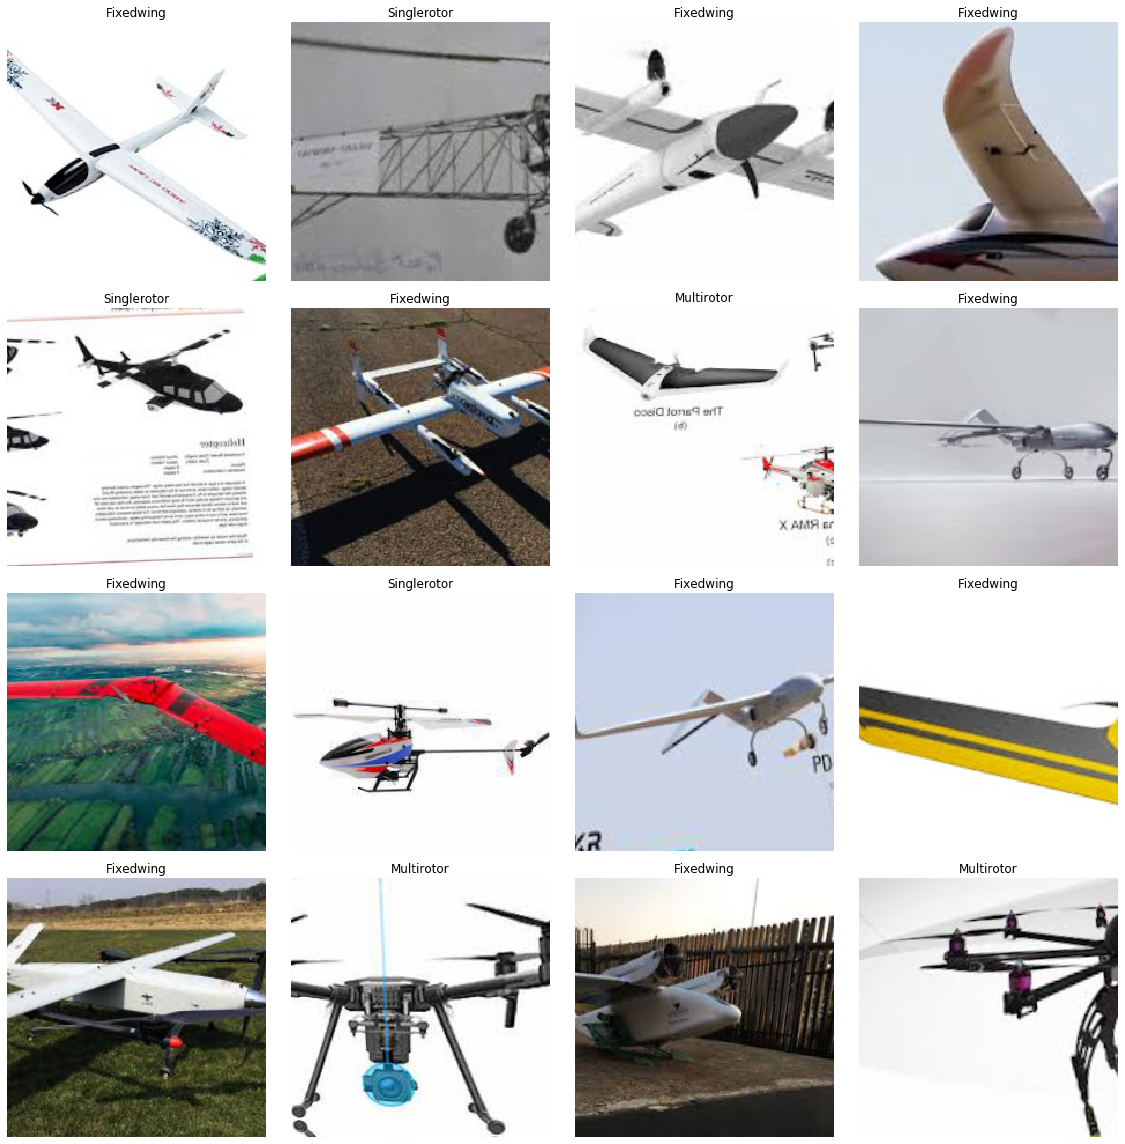

In [0]:
data.show_batch(rows=4,fig_size=(7,7))

In [0]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['Fixedwing', 'Multirotor', 'Singlerotor'], 3, 192, 48)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.820005,0.986402,0.354167,00:04
1,1.243173,0.831667,0.145833,00:03
2,1.002274,0.799332,0.145833,00:03
3,0.817282,0.787846,0.166667,00:03


In [0]:
learn.save('stage-1')

In [0]:
doc(learn.unfreeze)
learn.unfreeze??

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


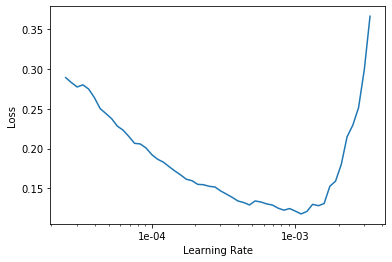

In [0]:
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-4,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.391906,2405.027100,0.645833,00:03
1,1.338179,149.622665,0.645833,00:03


In [0]:
learn.save('stage-2')

In [0]:
from fastai.widgets import *

In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

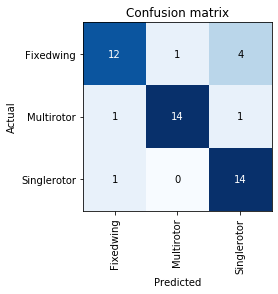

In [0]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

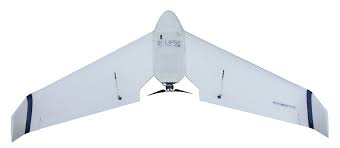

In [0]:
img = open_image('/content/drive/My Drive/data/droneclassifier/fixedwing drone.jpeg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category Fixedwing

In [0]:
learn.save('droneclassifier')

In [0]:
learn.export()